In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('HIV_dataset.csv')
d

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
...,...,...,...,...,...,...,...,...,...,...
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES,POSITIVE


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [4]:
d.isnull().sum()

Age                                0
Marital Staus                      0
STD                                0
Educational Background             0
HIV TEST IN PAST YEAR              0
AIDS education                     0
Places of seeking sex partners    22
SEXUAL ORIENTATION                 0
Drug- taking                       0
Result                             0
dtype: int64

In [5]:
d = d.dropna()
# Verify if null values are removed
d.isnull().sum()

Age                               0
Marital Staus                     0
STD                               0
Educational Background            0
HIV TEST IN PAST YEAR             0
AIDS education                    0
Places of seeking sex partners    0
SEXUAL ORIENTATION                0
Drug- taking                      0
Result                            0
dtype: int64

In [6]:
x=['Marital Staus','STD','Educational Background','HIV TEST IN PAST YEAR','AIDS education','Places of seeking sex partners','SEXUAL ORIENTATION','Drug- taking','Result']
for i in x:
    y=d[i].unique()
    print('Unique Values in Column :-',i,'\n')
    for j in y:
        print(j)
    print('\n')

Unique Values in Column :- Marital Staus 

UNMARRIED
Married
MARRIED
Widowed
Divorced
Cohabiting
DIvorced


Unique Values in Column :- STD 

NO
YES
No
Yes


Unique Values in Column :- Educational Background 

College Degree
Senior High School
Junior High School
Illiteracy
Primary School
College Dregree


Unique Values in Column :- HIV TEST IN PAST YEAR 

YES
NO


Unique Values in Column :- AIDS education 

NO
YES
No


Unique Values in Column :- Places of seeking sex partners 

Bar
Park
Internet
Public bath
Public Bath
Others


Unique Values in Column :- SEXUAL ORIENTATION 

Heterosexual
Bisexual
Homosexual
Hetersexual
BIsexual


Unique Values in Column :- Drug- taking 

YES
NO
No
Yes


Unique Values in Column :- Result 

POSITIVE
NEGATIVE
Positive
Negative




In [7]:
def apply_result(text):
    if text.lower() == "positive":
        return "Positive"
    else:
        return "Negative"

def apply_std(text):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

def applysxp(text):
    if text.lower() == "public bath":
        return "Public Bath"
    else:
        return text

def apply_ori(text):
    if text.lower() == "bisexual":
        return "Bisexual"
    elif text.lower() == 'hetersexual':
        return "Heterosexual"
    else:
        return text

def apply_aids(text):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

def apply_edu(text):
    if text == "College Dregree":
        return "College Degree"
    else:
        return text

def apply_sts(text):
    if text.lower() == "married":
        return "Married"
    elif text.lower() == "divorced":
        return "Divorced"
    else:
        return text

def apply_drg(text):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

def apply_test(text):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

# Making the data entries uniform using loc
d.loc[:, "Result"] = d["Result"].apply(apply_result)
d.loc[:, "STD"] = d["STD"].apply(apply_std)
d.loc[:, "Places of seeking sex partners"] = d["Places of seeking sex partners"].apply(applysxp)
d.loc[:, "SEXUAL ORIENTATION"] = d["SEXUAL ORIENTATION"].apply(apply_ori)
d.loc[:, "AIDS education"] = d["AIDS education"].apply(apply_aids)
d.loc[:, "Educational Background"] = d["Educational Background"].apply(apply_edu)
d.loc[:, "Marital Staus"] = d["Marital Staus"].apply(apply_sts)
d.loc[:, "Drug- taking"] = d["Drug- taking"].apply(apply_drg)
d.loc[:, "HIV TEST IN PAST YEAR"] = d["HIV TEST IN PAST YEAR"].apply(apply_test)

# Display unique values in each column
x = ['Marital Staus', 'STD', 'Educational Background', 'HIV TEST IN PAST YEAR', 'AIDS education', 'Places of seeking sex partners', 'SEXUAL ORIENTATION', 'Drug- taking', 'Result']
for i in x:
    y = d[i].unique()
    print('Unique Values in Column :-', i, '\n')
    for j in y:
        print(j)
    print('\n')


Unique Values in Column :- Marital Staus 

UNMARRIED
Married
Widowed
Divorced
Cohabiting


Unique Values in Column :- STD 

No
Yes


Unique Values in Column :- Educational Background 

College Degree
Senior High School
Junior High School
Illiteracy
Primary School


Unique Values in Column :- HIV TEST IN PAST YEAR 

Yes
No


Unique Values in Column :- AIDS education 

No
Yes


Unique Values in Column :- Places of seeking sex partners 

Bar
Park
Internet
Public Bath
Others


Unique Values in Column :- SEXUAL ORIENTATION 

Heterosexual
Bisexual
Homosexual


Unique Values in Column :- Drug- taking 

Yes
No


Unique Values in Column :- Result 

Positive
Negative




In [8]:

positive_df = d[d['Result'].str.lower() == 'positive']
bins = range(0, 101, 5)  
positive_df['age_bin'] = pd.cut(positive_df['Age'], bins=bins)
freq_dist = positive_df['age_bin'].value_counts().sort_index()
freq_table = freq_dist.reset_index()
freq_table.columns = ['Age Group', 'Frequency']
print(freq_table)


    Age Group  Frequency
0      (0, 5]          0
1     (5, 10]          0
2    (10, 15]         22
3    (15, 20]         42
4    (20, 25]         54
5    (25, 30]         32
6    (30, 35]         34
7    (35, 40]         30
8    (40, 45]         26
9    (45, 50]         24
10   (50, 55]         12
11   (55, 60]         18
12   (60, 65]         10
13   (65, 70]         18
14   (70, 75]          6
15   (75, 80]         10
16   (80, 85]          0
17   (85, 90]          0
18   (90, 95]          0
19  (95, 100]          0


C:\Windows\Temp\ipykernel_18308\3953168371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['age_bin'] = pd.cut(positive_df['Age'], bins=bins)


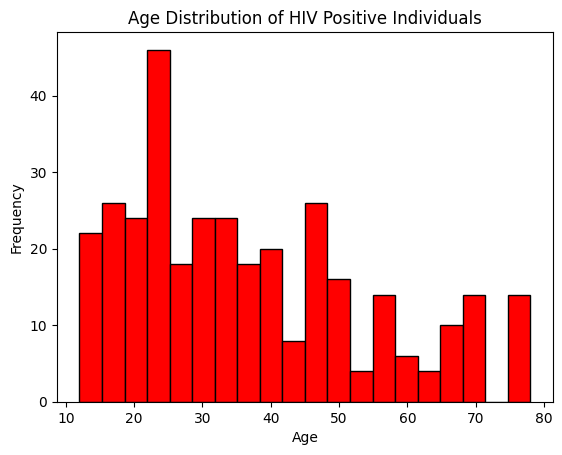

In [9]:
plt.hist(positive_df['Age'], bins=20, edgecolor='black',color='red')
plt.title('Age Distribution of HIV Positive Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()